# Random Forest Classification

In [1]:
import random
import numpy as np
import pandas as pd
import seaborn as sn
from numpy import std
from numpy import mean
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
%matplotlib inline

In [4]:
%cd Z:\PPMI_Data\Excels\NonMotors\Derived250
df = pd.read_csv('NonMotor_SocioBehavior_Categorized_Edit.csv')
df['APPRDX'] = df['APPRDX'] - 1
print(df.shape)
df.head(2)

Z:\PPMI_Data\Excels\NonMotors\Derived250
(250, 46)


,APPRDX,Benton,COGSTATE,Clock,Epworth,Geriatric_Depression,Hopkins,Hopkins_Recog,LetterNumber,Lexical_Fluency,...,SCOPA_Sex,Semantic,Education,Hand,STAIS,STAIA,Symbol_Digit,Trail_Making_A,Trail_Making_B,UPSIT
0,0,0,0,0,1,1,0,0,1,1,...,1,0,1,0,2,1,1,1,1,2
1,1,0,1,0,0,1,0,0,1,1,...,0,1,0,0,1,2,2,1,1,0


In [8]:
dataset = df.groupby('APPRDX').apply(lambda x: x.sample(80, random_state=1))
X = dataset.iloc[:, 1:].values
y = dataset.iloc[:, 0].values
classifier = RandomForestClassifier(n_estimators=100, criterion='gini')

# Generate predicted probabilities using cross-validation
y_prob = cross_val_predict(classifier, X, y, cv=10, method='predict_proba')
y_pred = np.argmax(y_prob, axis=1)

# Compute confusion matrix
cm = confusion_matrix(y, y_pred)

# Compute classification report
report = classification_report(y, y_pred, target_names=['Patient', 'Healthy'])

# Compute sensitivity, specificity, and balanced accuracy
tn, fp, fn, tp = cm.ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
balanced_accuracy = (sensitivity + specificity) / 2

print('Confusion matrix:')
print(cm)
print('Classification report:')
print(report)
print('Sensitivity:', sensitivity)
print('Specificity:', specificity)
print('Balanced accuracy:', balanced_accuracy)


Confusion matrix:
[[59 21]
 [18 62]]
Classification report:
              precision    recall  f1-score   support

     Patient       0.77      0.74      0.75        80
     Healthy       0.75      0.78      0.76        80

    accuracy                           0.76       160
   macro avg       0.76      0.76      0.76       160
weighted avg       0.76      0.76      0.76       160

Sensitivity: 0.775
Specificity: 0.7375
Balanced accuracy: 0.7562500000000001


# Running Model with different Features

## RanFor 100 times, all 45 Feats 

In [3]:
np.random.seed (1)
dframe1 = pd.DataFrame(columns=['Accuracy', 'Std_Dev'])

for i in range(1, 101):
    print(i)
    df2 = df.groupby('APPRDX').apply(lambda x: x.sample(80))
    X = df2.drop('APPRDX', axis = 1)
    y = df2['APPRDX']
    random_forest_model = RandomForestClassifier(n_estimators = 100, max_depth = 5, criterion = 'gini')
    scores = cross_val_score(random_forest_model, X, y, cv = 10, n_jobs = -1)
    mean_score = scores.mean()
    print(f'Mean accuracy: {mean_score}')
    new_row = {'Accuracy': mean_score, 'Std_Dev': std(scores)}
    dframe1 = pd.concat([dframe1, pd.DataFrame(new_row, index=[0])], ignore_index=True)


1
Mean accuracy: 0.81875
2
Mean accuracy: 0.81875
3
Mean accuracy: 0.8
4
Mean accuracy: 0.79375
5
Mean accuracy: 0.83125
6
Mean accuracy: 0.86875
7
Mean accuracy: 0.8125
8
Mean accuracy: 0.8125
9
Mean accuracy: 0.83125
10
Mean accuracy: 0.81875
11
Mean accuracy: 0.83125
12
Mean accuracy: 0.80625
13
Mean accuracy: 0.79375
14
Mean accuracy: 0.8375
15
Mean accuracy: 0.78125
16
Mean accuracy: 0.85625
17
Mean accuracy: 0.825
18
Mean accuracy: 0.80625
19
Mean accuracy: 0.8375
20
Mean accuracy: 0.78125
21
Mean accuracy: 0.81875
22
Mean accuracy: 0.8625
23
Mean accuracy: 0.80625
24
Mean accuracy: 0.825
25
Mean accuracy: 0.78125
26
Mean accuracy: 0.8
27
Mean accuracy: 0.7875
28
Mean accuracy: 0.78125
29
Mean accuracy: 0.7875
30
Mean accuracy: 0.85
31
Mean accuracy: 0.8125
32
Mean accuracy: 0.7875
33
Mean accuracy: 0.8
34
Mean accuracy: 0.7875
35
Mean accuracy: 0.8
36
Mean accuracy: 0.81875
37
Mean accuracy: 0.7875
38
Mean accuracy: 0.79375
39
Mean accuracy: 0.83125
40
Mean accuracy: 0.825
41
Me

In [4]:
print(mean(dframe1['Accuracy']))
dframe1.to_csv ("NonMotor_45Feats_100RF10FCV_Categ.csv", index=False)

0.8046875000000001


In [29]:
df['APPRDX'] = df['APPRDX'] -1
df.head()

,APPRDX,Benton,COGSTATE,Clock,Epworth,Geriatric_Depression,Hopkins,Hopkins_Recog,LetterNumber,Lexical_Fluency,...,SCOPA_Sex,Semantic,Education,Hand,STAIS,STAIA,Symbol_Digit,Trail_Making_A,Trail_Making_B,UPSIT
0,0,0,0,0,1,1,0,0,1,1,...,1,0,1,0,2,1,1,1,1,2
1,1,0,1,0,0,1,0,0,1,1,...,0,1,0,0,1,2,2,1,1,0
2,1,0,0,1,1,0,0,0,1,2,...,0,0,0,0,0,1,1,0,1,0
3,0,0,0,1,0,1,0,0,1,1,...,0,2,1,0,0,0,1,0,0,2
4,1,0,0,1,0,1,0,0,1,2,...,0,0,0,0,1,2,2,1,1,0


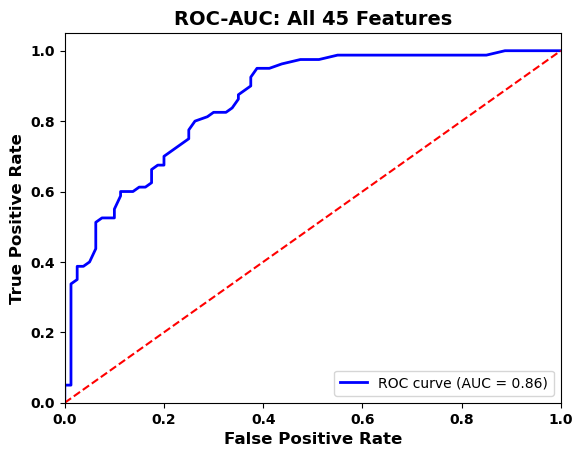

In [32]:
dataset = df.groupby('APPRDX').apply(lambda x: x.sample(80, random_state=1))
X = dataset.iloc[:, 1:].values
y = dataset.iloc[:, 0].values
classifier = RandomForestClassifier(n_estimators=100, criterion='gini')

# Generate predicted probabilities using cross-validation
y_prob = cross_val_predict(classifier, X, y, cv=10, method='predict_proba')

# Calculate the false positive rate and true positive rate for different thresholds
fpr, tpr, thresholds = roc_curve(y, y_prob[:, 1], pos_label=1)

# Calculate the area under the ROC curve
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, color='b', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='r', lw=1.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.xlabel('False Positive Rate', fontweight='bold',fontsize=12)
plt.ylabel('True Positive Rate', fontweight='bold',fontsize=12)
plt.title('ROC-AUC: All 45 Features', fontweight='bold',fontsize=14)
plt.legend(loc="lower right")
# save the plot as SVG and PDF files
plt.savefig('ROC_AUC_All45Features_Categ.svg')
plt.savefig('ROC_AUC_All45Features_Categ.pdf')
plt.show()


## RanFor 100 times. Uncategorized i.e. Original Scores